## Sales From Advertising Regression Model

The following project was done through a guided video by Data School. I highly recommend this as the instructions and explanations were easy to follow: https://www.youtube.com/watch?v=3ZWuPVWq7p4

## Reading Data Through Pandas

The data set used for this project contains sales through different advertising channels: TV, radio and newspaper.

In [36]:
import pandas as pd

In [37]:
data = pd.read_csv('http://faculty.marshall.usc.edu/gareth-james/ISL/Advertising.csv', index_col=0)

data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [38]:
data.tail()

,TV,radio,newspaper,sales
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5
200,232.1,8.6,8.7,13.4


In [39]:
data.shape

(200, 4)

This data set contains 200 rows and 4 columns of data.

## Visualizing the Data

The next steps involve visualizing the data for any interesting patterns or relationships between sales and the advertising channels.

In [40]:
import seaborn as sns

%matplotlib inline

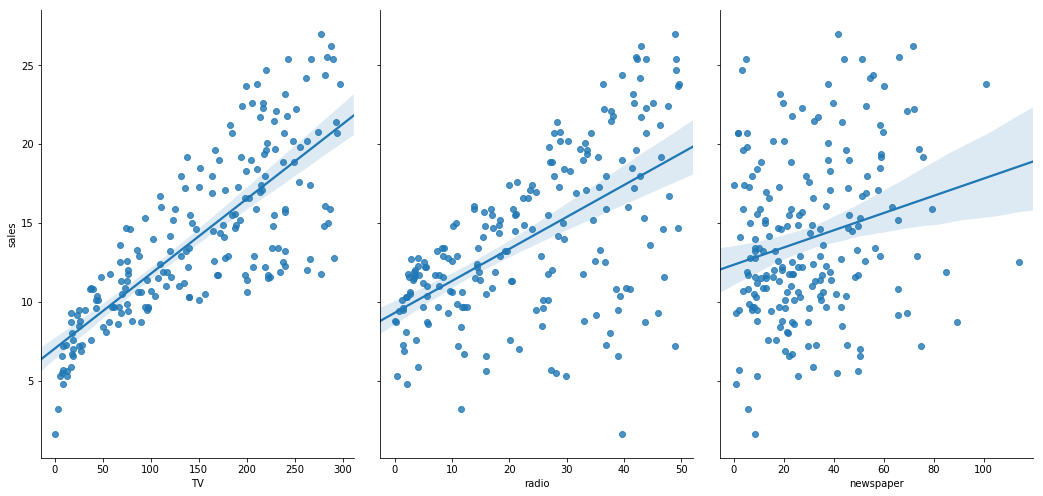

In [65]:
sns.pairplot(data, x_vars=['TV','radio','newspaper'], y_vars='sales', size=7, aspect=0.7, kind='reg')

The above scatter plots show the relationship between: 1.) sales and TV 2.) sales and radio and 3.) sales and newspaper. Notice that the strongest relationship appears to be between sales and TV with newspaper being the weakest.

In [42]:
# Pandas is built on top of numpy arrays
# This allows for a smooth transition to scikit-learn, which requires numpy arrays

feature_cols = ['TV','radio','newspaper']

X = data[feature_cols]

X = data[['TV', 'radio', 'newspaper']]

X.head()

,TV,radio,newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [43]:
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(200, 3)


In [44]:
y = data['sales']
y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: sales, dtype: float64

In [45]:
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(200,)


## Building a Model

The next steps will involve using sci-kit learn to train and test a model. Given that we are trying to predict a continuous value (sales) based on a set of inputs (advertising channels), a regression model appears to be the best candidate.

The first step will be to split the data between a train and test set.

In [46]:
# default split is 75% for training and 25% for testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [47]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(150, 3)
(150,)
(50, 3)
(50,)


In [48]:
# import model
from sklearn.linear_model import LinearRegression

# instantiate
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

LinearRegression()

In [49]:
print(linreg.intercept_)
print(linreg.coef_)

2.87696662232
[ 0.04656457  0.17915812  0.00345046]


In [50]:
list(zip(feature_cols, linreg.coef_))

[('TV', 0.046564567874150267),
 ('radio', 0.17915812245088833),
 ('newspaper', 0.0034504647111804365)]

In [51]:
# make predictions on the test set
y_pred = linreg.predict(X_test)

In [63]:
# some commone evaluation metrics for linear regressions:

# Mean Absolute Error (MAE) is the mean of the absolute value of the errors.print(X_train.shape)
# from sklearn import metrics
# print metrics.mean_absolute_error(true, pred)
# MAE is the easiest to understand, because it's the average error

# Mean Squared Error (MSE) is the mean of the squared errors.
# print metrics.mean_squared_error(true, pred)
# MSE is more popular than MAE, because MSE "punishes" large errors

# Root Mean Squared Error (RMSE) is the square root of MSE
# import numpy as np
# print np.sqrt(metrics.mean_squared_error(true, pred))
# RMSE is even more popular than MSE, because RMSE is interpretable in the "y" units

# Higher R-squared preferred, because you're interpreting more variability
# RMSE measuring the standard deviation of the residuals, measure of "spread" or noise

In [62]:
from sklearn.metrics import mean_squared_error
import numpy as np

feature_cols = ['TV','radio']

X = data[feature_cols]

y = data.sales

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

linreg.fit(X_train, y_train)

y_pred = linreg.predict(X_test)

print(np.sqrt(mean_squared_error(y_test, y_pred)))

1.38790346994
